##### Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [82]:
from sklearn.model_selection import train_test_split

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [119]:
from sklearn.naive_bayes import GaussianNB

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
from sklearn.neighbors import KNeighborsClassifier

### Reading Data

In [2]:
df=pd.read_csv('DS3_C6_S2_Classification_BankChurn_Data_Project.csv')

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Since we do not need certain columns like Customerid, Surname we shall drop these columns

In [5]:
df.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##### Checking for null or noise values in data

In [11]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##### Checking for noise in data

In [12]:
# Seperating numerical and categorical Data
num_data=df.select_dtypes(include=[np.number])
cat_data=df.select_dtypes(exclude=[np.number])

In [13]:
for col1 in list(cat_data.columns):
    print(round(df[col1].value_counts()))
    print('**********************')

France     5001
Germany    2502
Spain      2469
france        7
espanio       6
fra           6
ger           4
spain         2
germany       1
gernamy       1
GERMANY       1
Name: Geography, dtype: int64
**********************
Male      5457
Female    4543
Name: Gender, dtype: int64
**********************


##### Since there are only three countries but they have been assigned different names, we must seperate the countries properly

In [14]:
Country=[]
for i in df['Geography']:
    if (i=='France')|(i=='france')|(i=='fra'):
        Country.append('France')
    elif (i=='Germany')|(i=='ger')|(i=='germany')|(i=='gernamy')|(i=='GERMANY'):
        Country.append('Germany')
    else:
        Country.append('Spain')
Country

['France',
 'Spain',
 'France',
 'France',
 'Spain',
 'Spain',
 'France',
 'Germany',
 'France',
 'France',
 'France',
 'Spain',
 'France',
 'France',
 'Spain',
 'Germany',
 'Germany',
 'Spain',
 'Spain',
 'France',
 'France',
 'Spain',
 'Spain',
 'France',
 'France',
 'France',
 'Germany',
 'France',
 'Germany',
 'France',
 'Spain',
 'France',
 'Germany',
 'Spain',
 'Spain',
 'France',
 'Spain',
 'Spain',
 'France',
 'Germany',
 'Spain',
 'France',
 'France',
 'France',
 'Spain',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'France',
 'Germany',
 'Germany',
 'France',
 'France',
 'Germany',
 'Spain',
 'France',
 'Germany',
 'Germany',
 'Spain',
 'Spain',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'France',
 'Germany',
 'France',
 'Spain',
 'Germany',
 'France',
 'France',
 'France',
 'France',
 'Spain',
 'Germany',
 'France',
 'France',
 'France',
 'France',
 'France',
 'Spain',
 'Spain',
 'France',
 'France',
 'Germany',
 'Spa

In [17]:
df['Geography']=Country

In [18]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

##### Checking for column dtypes

In [20]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

##### Performing necessary visualizations

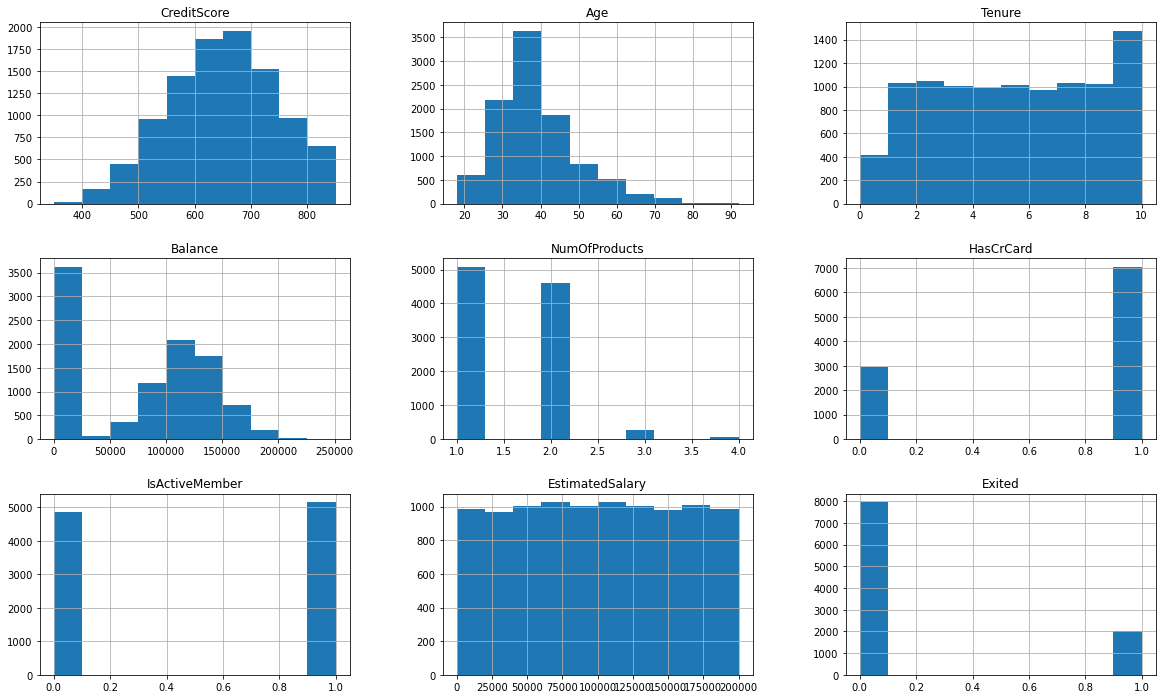

In [24]:
df.hist(figsize=(20,12))
plt.show()

##### Conclusions from the Histograms:
##### The Credit score is normally distributed
##### Age Group 32-40 has the highest distribution. The distribution among the age column is skewed to the left.
##### Tenure of 9-10 years has the highest distribution while tenure of 0-1 years has the minimum distribution. Tenure of 1-9 years has an even distribution.
##### Balance between 0-25000 has the maximum distribution
##### Most customers have 1 number of bank products and very few customers have more than 2 bank products.
##### Most customers own credit cards
##### The bank has almost an equal distribution active and non active members
##### The Estimated Salary is evenly distributed among the customers 
##### Most customers are still associated with the bank and have not left

<AxesSubplot:xlabel='Gender', ylabel='count'>

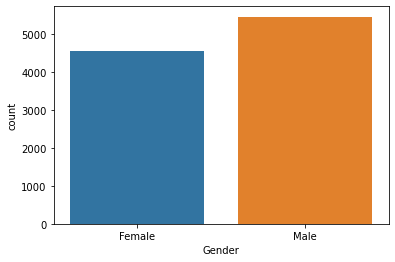

In [25]:
sb.countplot(data=df,x='Gender')

##### There are about 1000 more male customers compared to female customers

<AxesSubplot:xlabel='Geography', ylabel='count'>

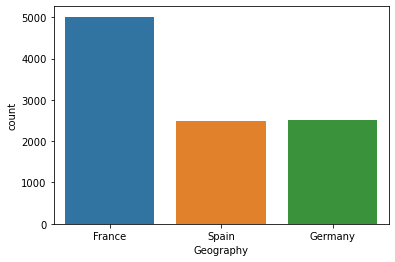

In [26]:
sb.countplot(data=df,x='Geography')

##### France has the majority of customers comprising of approximately 50% of all customers.
##### Spain and Germany have almost the same number of customers

##### Since our business objective is to determine which customers are likely to churn, our target variable is Exited

##### Performing visualizations with respect to churn

<AxesSubplot:xlabel='Gender', ylabel='count'>

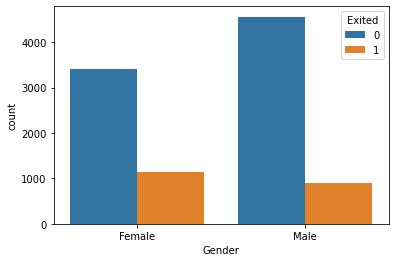

In [27]:
sb.countplot(data=df,x='Gender',hue='Exited')

##### The churn numbers are high amongst Female customers even though the count of Female customers is less compared to males

<AxesSubplot:xlabel='Geography', ylabel='count'>

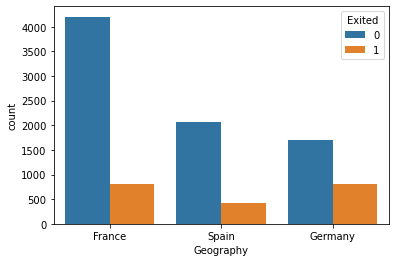

In [28]:
sb.countplot(data=df,x='Geography',hue='Exited')

##### Churned customers have almost an equal number in France and Germany. Although the number of customers are significantly low in Germany.
##### Churned customers have the least count among Spain customers.

In [29]:
ct1=pd.crosstab(index=df['Exited'],columns=df['Geography'],normalize='columns')
ct1

Geography,France,Germany,Spain
Exited,,,
0,0.838452,0.675568,0.833266
1,0.161548,0.324432,0.166734


<AxesSubplot:xlabel='Geography', ylabel='Exited'>

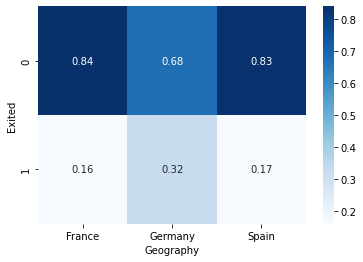

In [46]:
sb.heatmap(data=ct1,annot=True,cmap='Blues')

##### Churn percentages are maximum in Germany (32%).
##### Churn percentages are almost equal in France and Spain (16% and 17% respectively).

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

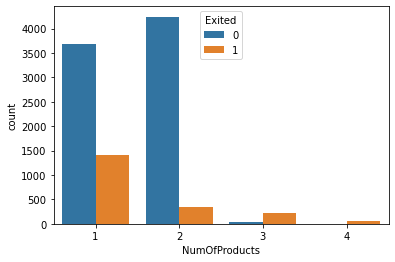

In [35]:
sb.countplot(data=df,x='NumOfProducts',hue='Exited')

##### Churn numbers are maximum among customers who have 1 product from the bank and minimum among customers who own 4.
##### Customers who own 3 and 4 bank products have more customers who have churned than customers who have not.

In [36]:
ct2=pd.crosstab(index=df['Exited'],columns=df['NumOfProducts'],normalize='columns')
ct2

NumOfProducts,1,2,3,4
Exited,,,,
0,0.722856,0.924183,0.172932,0.0
1,0.277144,0.075817,0.827068,1.0


<AxesSubplot:xlabel='NumOfProducts', ylabel='Exited'>

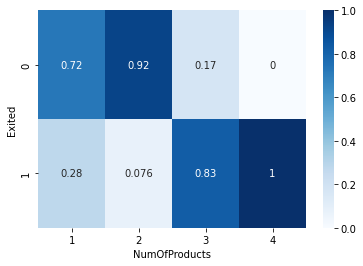

In [45]:
sb.heatmap(data=ct2,annot=True,cmap='Blues')

##### There was a 100% churn rate among customers who owned 4 bank products and an 83% churn rate among customers who had 3 bank products.
##### The churn rate was minimum among customers who had 2 bank products (7.6%).
##### The churn rate among customers who had 1 bank product was 28%.

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

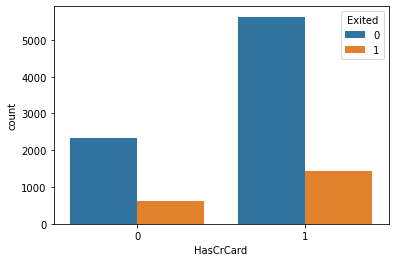

In [47]:
sb.countplot(data=df,x='HasCrCard',hue='Exited')

##### The churn numbers were higher among customers who had credit cards

In [49]:
ct3=pd.crosstab(index=df['Exited'],columns=df['HasCrCard'],normalize='columns')
ct3

HasCrCard,0,1
Exited,,
0,0.791851,0.798157
1,0.208149,0.201843


<AxesSubplot:xlabel='HasCrCard', ylabel='Exited'>

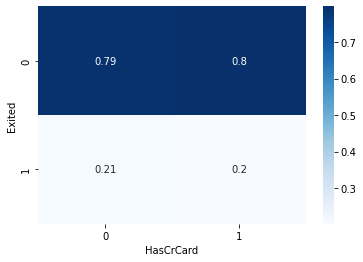

In [50]:
sb.heatmap(data=ct3,annot=True,cmap='Blues')

##### The churn rate was almost equal among customers with or without credit card (20% and 21% respectively)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

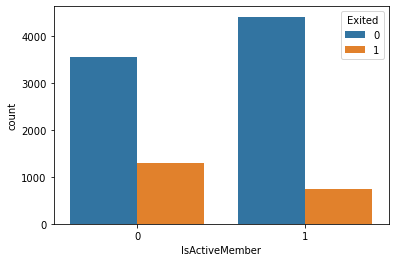

In [51]:
sb.countplot(data=df,x='IsActiveMember',hue='Exited')

##### The Churn numbers were higher among non-active members as compared to active members

In [52]:
ct4=pd.crosstab(index=df['Exited'],columns=df['IsActiveMember'],normalize='columns')
ct4

IsActiveMember,0,1
Exited,,
0,0.731491,0.857309
1,0.268509,0.142691


<AxesSubplot:xlabel='IsActiveMember', ylabel='Exited'>

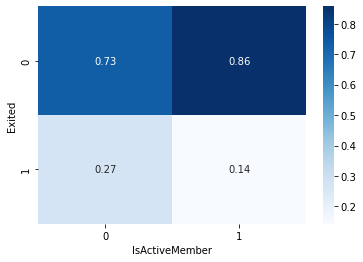

In [53]:
sb.heatmap(data=ct4,annot=True,cmap='Blues')

##### The churn rate is 27% among non-active members and 14% among active members

<AxesSubplot:xlabel='Tenure', ylabel='count'>

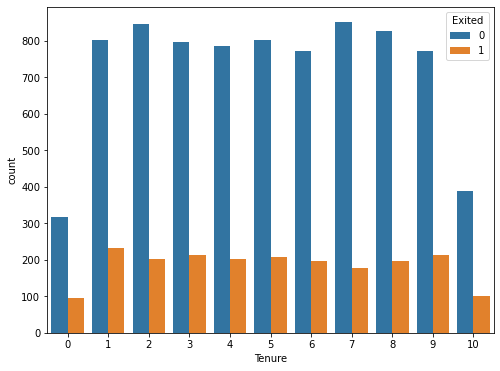

In [57]:
plt.figure(figsize=(8,6))
sb.countplot(data=df,x='Tenure',hue='Exited')

##### Churn numbers were less among customers with 0 and 10 years of tenure
##### Churn numbers were almost same for customers with 1-9 tears of tenure

In [58]:
# Now comparing churn with continuous data

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

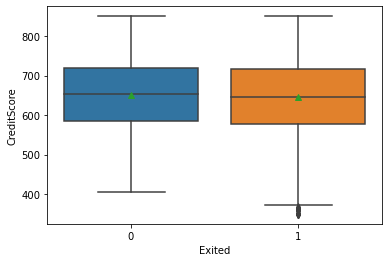

In [61]:
sb.boxplot(data=df,x='Exited',y='CreditScore',showmeans=True)

##### The range and median were almost the same among churned and existing customers.
##### There were a few outliers with very low credit score among churned customers.

<AxesSubplot:xlabel='Exited', ylabel='Age'>

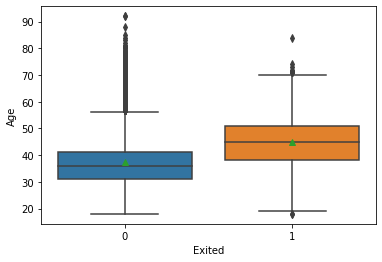

In [62]:
sb.boxplot(data=df,x='Exited',y='Age',showmeans=True)

##### Churned customers had a wider range of age and even had a higher mean age compared to existing customers
##### Existing customers had plenty outliers with respect to age.

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

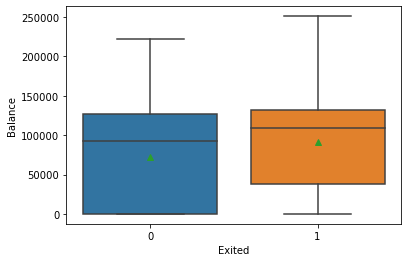

In [63]:
sb.boxplot(data=df,x='Exited',y='Balance',showmeans=True)

##### Churned customers had the wider range and greater mean balance compared to existing customers

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

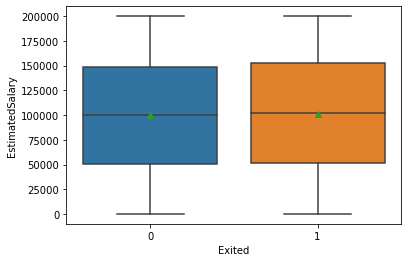

In [64]:
sb.boxplot(data=df,x='Exited',y='EstimatedSalary',showmeans=True)

##### The spread of Estimated salary among churned customers and existing customers is almost identical with both having similar means aswell

In [65]:
# checking for the datatypes of the columns
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

##### Converting object datatype to categorical

In [66]:
# Creating copy of dataframe
df1=df.copy()

In [67]:
df1['Geography']=df1['Geography'].astype('category')
df1['Gender']=df1['Gender'].astype('category')

##### Encoding the categorical columns

In [70]:
label_encoder=preprocessing.LabelEncoder()

In [71]:
df1['Geography']=label_encoder.fit_transform(df1['Geography'])
df1['Gender']=label_encoder.fit_transform(df1['Gender'])

In [72]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [73]:
df1_copy=df1.copy()

##### Finding features that are highly correlated to target variable (exited)

<AxesSubplot:>

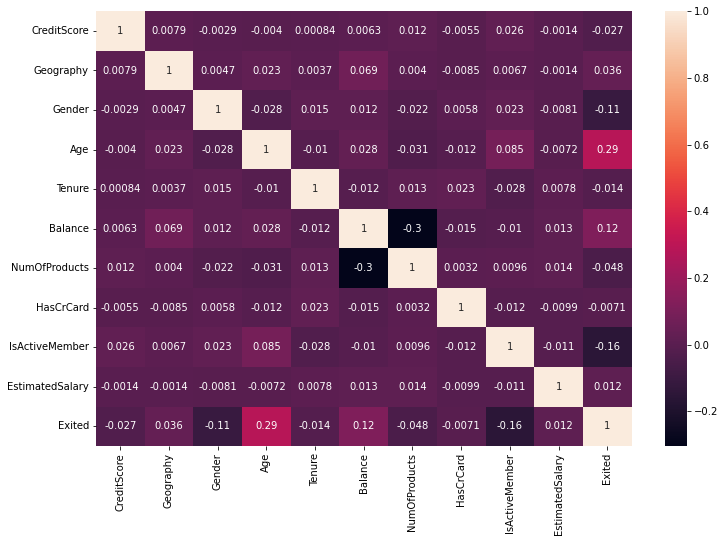

In [74]:
plt.figure(figsize=(12,8))
sb.heatmap(data=df1_copy.corr(),annot=True)

##### Since all columns have very less correlation with the label, all columns are considered as it's features for modelling

In [75]:
df1.drop('Exited',axis=1,inplace=True)

##### Performing Scaling on the features

In [76]:
# Since the features are not normally distributed, we perform min-max scaling

In [77]:
scaler=MinMaxScaler()

In [78]:
df_scaled=pd.DataFrame(scaler.fit_transform(df1.to_numpy()),columns=df1.columns)

In [79]:
df_scaled.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


##### Performing Feature Selection

In [80]:
X=df_scaled
y=df1_copy[['Exited']]
X.shape,y.shape

((10000, 10), (10000, 1))

##### Splitting data into train set and test set in 70:30 ratio

In [83]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)

In [84]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7000, 10), (3000, 10), (7000, 1), (3000, 1))

### 1) Performing Logistic Regression

In [95]:
model1=LogisticRegression().fit(x_train,y_train)

In [96]:
train_accuracy=round(model1.score(x_train,y_train)*100,2)
train_accuracy

81.03

##### Since we have got an 81.03% accuracy on our train dataset, it can be considered a good model for prediction

In [99]:
y_pred_LR=model1.predict(x_test)

In [100]:
data1=pd.DataFrame()

In [102]:
data1['Actual_y']=y_test
data1['Predicted_y']=y_pred_LR
data1

,Actual_y,Predicted_y
8793,0,0
1122,1,1
1283,0,0
9318,0,0
7765,0,1
...,...,...
3024,0,0
5904,1,0
3807,0,0
6746,0,0


In [103]:
# model coefficient
model1.coef_

array([[-0.18540138,  0.14826651, -0.56441847,  5.15194   , -0.24461751,
         1.2312749 , -0.02599254, -0.04084244, -1.03417598,  0.09173647]])

In [106]:
coeff_df=pd.DataFrame(df_scaled.columns.delete(0))
coeff_df.columns=['Feature']
coeff_df['slope']=pd.Series(model1.coef_[0])
coeff_df.sort_values(by='slope',ascending=False)

,Feature,slope
3,Tenure,5.151940
5,NumOfProducts,1.231275
1,Gender,0.148267
6,HasCrCard,-0.025993
7,IsActiveMember,-0.040842
0,Geography,-0.185401
4,Balance,-0.244618
2,Age,-0.564418
8,EstimatedSalary,-1.034176


In [104]:
# model intercept
model.intercept_

array([-2.44802034])

In [108]:
# test accuaracy
test_accuracy=round(model1.score(x_test,y_test)*100,2)
test_accuracy

80.03

##### The accuracy score obtained for our test dataset is 80.03 which is quite good and is a near perfect fit model when comparing with the accuracy of the train dataset

In [128]:
print(confusion_matrix(y_test,y_pred_LR))

[[2295   68]
 [ 531  106]]


In [129]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred_LR).ravel()
print('True Negative count:',tn)
print('True Positive count:',tp)
print('False Positive count:',fp)
print('False Negative count:',fn)

True Negative count: 2295
True Positive count: 106
False Positive count: 68
False Negative count: 531


##### From the confusion matrix it is evident that most results were predicted accurately but there was a high inaccuracy number for False Negative predictions

In [130]:
print('accuracy:',accuracy_score(y_test,y_pred_LR))
print('recall:', recall_score(y_test,y_pred_LR))
print('f1-score:', f1_score(y_test,y_pred_LR))
print('precision:',precision_score(y_test,y_pred_LR))

accuracy: 0.8003333333333333
recall: 0.1664050235478807
f1-score: 0.26140567200986436
precision: 0.6091954022988506


In [115]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2363
           1       0.61      0.17      0.26       637

    accuracy                           0.80      3000
   macro avg       0.71      0.57      0.57      3000
weighted avg       0.77      0.80      0.75      3000



In [ ]:
# Checking for ROC-AUC Score

In [140]:
roc1=roc_auc_score(y_test, model1.predict_proba(x_test)[:,1])
roc1

0.7497766123604948

##### Using LR we obtain a good ROC-AUC score however there is still scope for improvement

In [ ]:
# ROC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.750


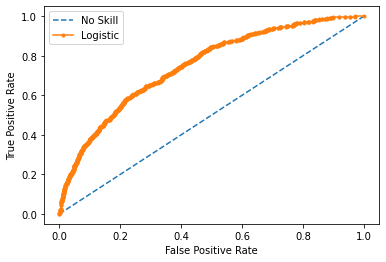

In [141]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model1.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

##### From the classification report it is evident that the precision of predicting 1 is slightly low (61%)

In [116]:
# Checking for wrong predicted values

In [117]:
data1[(data1['Actual_y']!=data1['Predicted_y'])]

,Actual_y,Predicted_y
7765,0,1
9314,1,0
1631,1,0
9125,1,0
7216,1,0
...,...,...
5214,1,0
5314,1,0
9956,1,0
8095,1,0


##### Therefore we can see that there are 599 out of 3000 predictions that were incorrect. Therefore there is room for improvement in the model.

### 2) Applying Naive Bayes Decision Tree Classification Model

In [120]:
model2=GaussianNB()
model2.fit(x_train,y_train)

GaussianNB()

In [131]:
# Train accuracy
(model2.score(x_train,y_train))*100

82.94285714285714

In [132]:
# Test accuracy
(model2.score(x_test,y_test))*100

82.46666666666667

##### The accuracy score obtained for our test dataset is 82.46 which is quite good and is a near perfect fit model when comparing with the accuracy of the train dataset

In [125]:
# Predicted y
y_pred_NBDT=model2.predict(x_test)

In [248]:
data2=pd.DataFrame()

In [249]:
data2['Actual_y']=y_test
data2['Predicted_y']=y_pred_NBDT
data2

,Actual_y,Predicted_y
8793,0,0
1122,1,0
1283,0,0
9318,0,0
7765,0,0
...,...,...
3024,0,0
5904,1,1
3807,0,0
6746,0,0


In [133]:
print(confusion_matrix(y_test,y_pred_NBDT))

[[2319   44]
 [ 482  155]]


In [134]:
tn2,fp2,fn2,tp2=confusion_matrix(y_test,y_pred_NBDT).ravel()
print('True Negative count:',tn2)
print('True Positive count:',tp2)
print('False Positive count:',fp2)
print('False Negative count:',fn2)

True Negative count: 2319
True Positive count: 155
False Positive count: 44
False Negative count: 482


##### From the confusion matrix it is evident that most results were predicted accurately but there was a high inaccuracy number for False Negative predictions but still less compared to Logistic Regression

In [135]:
print('accuracy:',accuracy_score(y_test,y_pred_NBDT))
print('recall:', recall_score(y_test,y_pred_NBDT))
print('f1-score:', f1_score(y_test,y_pred_NBDT))
print('precision:',precision_score(y_test,y_pred_NBDT))

accuracy: 0.8246666666666667
recall: 0.24332810047095763
f1-score: 0.3708133971291866
precision: 0.7788944723618091


In [136]:
print(classification_report(y_test, y_pred_NBDT))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2363
           1       0.78      0.24      0.37       637

    accuracy                           0.82      3000
   macro avg       0.80      0.61      0.63      3000
weighted avg       0.82      0.82      0.79      3000



##### From the classification report we can see that there was a significant improvement in the prediction of 1 (78%) compared to Logistic Regression (61%) 

In [ ]:
# Checking for ROC-AUC Score

In [142]:
roc2=roc_auc_score(y_test, model2.predict_proba(x_test)[:,1])
roc2

0.8001781786317184

##### There was an improvement in the ROC-AUC score when comparing with LR (0.8>0.75)

In [ ]:
# ROC-AUC curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.800


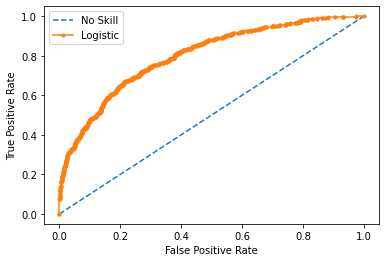

In [143]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model2.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [137]:
# Checking for wrong predicted values

In [250]:
data2[(data2['Actual_y']!=data2['Predicted_y'])]

,Actual_y,Predicted_y
1122,1,0
9314,1,0
1631,1,0
9125,1,0
6116,0,1
...,...,...
1369,1,0
3382,0,1
5214,1,0
9956,1,0


##### Therefore we can see that there are 526 out of 3000 predictions that were incorrect which is an improvement from the LR model which gave 599 incorrect predictions

### 3) Decision Tree Classification Model

In [147]:
model3=DecisionTreeClassifier(max_depth=5,random_state=0)
model3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [148]:
# Train accuracy
(model3.score(x_train,y_train))*100

86.0142857142857

In [150]:
# Test accuracy
(model3.score(x_test,y_test))*100

84.53333333333333

##### The accuracy score obtained for our test dataset is 84.53 which is quite good and is a near perfect fit model when comparing with the accuracy of the train dataset

In [151]:
# Predicted y
y_pred_DT=model3.predict(x_test)

In [152]:
data3=pd.DataFrame()

In [154]:
data3['Actual_y']=y_test
data3['Predicted_y']=y_pred_DT
data3

,Actual_y,Predicted_y
8793,0,0
1122,1,1
1283,0,0
9318,0,0
7765,0,1
...,...,...
3024,0,0
5904,1,1
3807,0,0
6746,0,0


In [155]:
print(confusion_matrix(y_test,y_pred_DT))

[[2289   74]
 [ 390  247]]


In [156]:
tn3,fp3,fn3,tp3=confusion_matrix(y_test,y_pred_DT).ravel()
print('True Negative count:',tn3)
print('True Positive count:',tp3)
print('False Positive count:',fp3)
print('False Negative count:',fn3)

True Negative count: 2289
True Positive count: 247
False Positive count: 74
False Negative count: 390


##### From the confusion matrix it is evident that most results were predicted accurately but there was a high inaccuracy number for False Negative predictions but still less compared to Logistic Regression and Naive Bayes Decision Tree classification.
##### However there was a slight increase in the false positive count as compared to the previous models.

In [157]:
print('accuracy:',accuracy_score(y_test,y_pred_DT))
print('recall:', recall_score(y_test,y_pred_DT))
print('f1-score:', f1_score(y_test,y_pred_DT))
print('precision:',precision_score(y_test,y_pred_DT))

accuracy: 0.8453333333333334
recall: 0.3877551020408163
f1-score: 0.5156576200417536
precision: 0.7694704049844237


In [158]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2363
           1       0.77      0.39      0.52       637

    accuracy                           0.85      3000
   macro avg       0.81      0.68      0.71      3000
weighted avg       0.84      0.85      0.82      3000



##### The precision score for predicting existing customers was improved as compared to the previous models but there was a slight drop in the presion score of predicting churned customers

In [159]:
# Checking for ROC-AUC Score

In [160]:
roc3=roc_auc_score(y_test, model3.predict_proba(x_test)[:,1])
roc3

0.8193423467892968

##### There was an improvement in the ROC-AUC score when comparing with previous models

In [ ]:
# ROC-AUC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.819


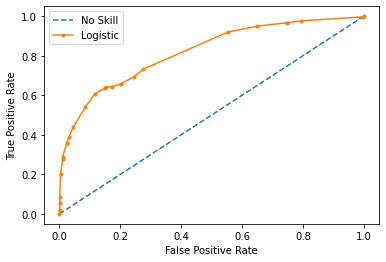

In [161]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model3.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [162]:
# Checking for wrong predicted values

In [163]:
data3[(data3['Actual_y']!=data3['Predicted_y'])]

,Actual_y,Predicted_y
7765,0,1
9314,1,0
1631,1,0
9125,1,0
6201,0,1
...,...,...
7209,1,0
5158,0,1
1369,1,0
5214,1,0


##### There was a significant drop in the number of incorrect predictions compared to the previous models

### 4) Random Forest Classification

In [182]:
model4 = RandomForestClassifier(max_depth=5,random_state=0)
model4.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [183]:
# Train accuracy
(model4.score(x_train,y_train))*100

86.42857142857143

In [184]:
# Test accuracy
(model4.score(x_test,y_test))*100

85.0

##### The accuracy score obtained for our test dataset is 85 which is quite good and is a near perfect fit model when comparing with the accuracy of the train dataset

In [185]:
# Predicted y
y_pred_RF=model4.predict(x_test)

In [186]:
data4=pd.DataFrame()

In [187]:
data4['Actual_y']=y_test
data4['Predicted_y']=y_pred_RF
data4

,Actual_y,Predicted_y
8793,0,0
1122,1,0
1283,0,0
9318,0,0
7765,0,0
...,...,...
3024,0,0
5904,1,1
3807,0,0
6746,0,0


In [188]:
# Confusion Matrix

In [189]:
print(confusion_matrix(y_test,y_pred_RF))

[[2311   52]
 [ 398  239]]


In [190]:
tn4,fp4,fn4,tp4=confusion_matrix(y_test,y_pred_RF).ravel()
print('True Negative count:',tn4)
print('True Positive count:',tp4)
print('False Positive count:',fp4)
print('False Negative count:',fn4)

True Negative count: 2311
True Positive count: 239
False Positive count: 52
False Negative count: 398


##### From the confusion matrix it is evident that most results were predicted accurately but there was a high inaccuracy number for False Negative predictions.

In [191]:
print('accuracy:',accuracy_score(y_test,y_pred_RF))
print('recall:', recall_score(y_test,y_pred_RF))
print('f1-score:', f1_score(y_test,y_pred_RF))
print('precision:',precision_score(y_test,y_pred_RF))

accuracy: 0.85
recall: 0.3751962323390895
f1-score: 0.5150862068965517
precision: 0.8213058419243986


In [192]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2363
           1       0.82      0.38      0.52       637

    accuracy                           0.85      3000
   macro avg       0.84      0.68      0.71      3000
weighted avg       0.85      0.85      0.83      3000



##### From the classification report we can see that Random forest classification model by far gives the best precision scores for existing and churned customers

In [193]:
# Checking for ROC-AUC score

In [194]:
roc4=roc_auc_score(y_test, model4.predict_proba(x_test)[:,1])
roc4

0.8415871052350103

##### We obtain an ROC-AUC score better than the previous models

In [196]:
# ROC-AUC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.842


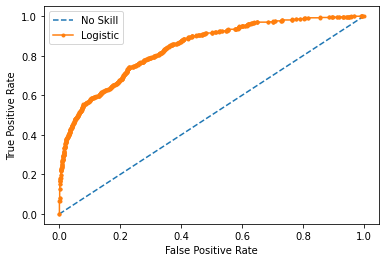

In [197]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model4.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [198]:
# Checking for wrong predicted values

In [199]:
data4[(data4['Actual_y']!=data4['Predicted_y'])]

,Actual_y,Predicted_y
1122,1,0
9314,1,0
1631,1,0
9125,1,0
4680,0,1
...,...,...
7209,1,0
5158,0,1
1369,1,0
5214,1,0


##### We can see that there are 450 wrong predicted values which is by far the most accurate model

### 5) KNN Classifier

In [202]:
model5=KNeighborsClassifier(n_neighbors=7)
model5.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [203]:
# Train accuracy
(model5.score(x_train,y_train))*100

85.35714285714285

In [204]:
# Test accuracy
(model5.score(x_test,y_test))*100

81.6

##### We can see that the model fails to perform well for test data as compared to training data, the model therefore suffers from overfitting

In [205]:
# Predicted y
y_pred_KNN=model5.predict(x_test)

In [206]:
data5=pd.DataFrame()

In [207]:
data5['Actual_y']=y_test
data5['Predicted_y']=y_pred_KNN
data5

,Actual_y,Predicted_y
8793,0,0
1122,1,1
1283,0,0
9318,0,0
7765,0,0
...,...,...
3024,0,0
5904,1,1
3807,0,0
6746,0,0


In [208]:
# Confusion Matrix

In [209]:
print(confusion_matrix(y_test,y_pred_KNN))

[[2270   93]
 [ 459  178]]


In [210]:
tn5,fp5,fn5,tp5=confusion_matrix(y_test,y_pred_KNN).ravel()
print('True Negative count:',tn5)
print('True Positive count:',tp5)
print('False Positive count:',fp5)
print('False Negative count:',fn5)

True Negative count: 2270
True Positive count: 178
False Positive count: 93
False Negative count: 459


##### We can see from the confusion matrix that the model is inferior compared to Random Forest Classifier and Decision Tree Classifier

In [211]:
print('accuracy:',accuracy_score(y_test,y_pred_KNN))
print('recall:', recall_score(y_test,y_pred_KNN))
print('f1-score:', f1_score(y_test,y_pred_KNN))
print('precision:',precision_score(y_test,y_pred_KNN))

accuracy: 0.816
recall: 0.2794348508634223
f1-score: 0.39207048458149774
precision: 0.6568265682656826


In [212]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2363
           1       0.66      0.28      0.39       637

    accuracy                           0.82      3000
   macro avg       0.74      0.62      0.64      3000
weighted avg       0.79      0.82      0.79      3000



##### From the classification report it is evident that the precision score for predicting churned customers is poor (66%).

In [213]:
# Checking for ROC-AUC score

In [215]:
roc5=roc_auc_score(y_test, model5.predict_proba(x_test)[:,1])
roc5

0.7532621238866326

##### We can see that the roc score obtained is inferior to the previous models

In [ ]:
# ROC-AUC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.753


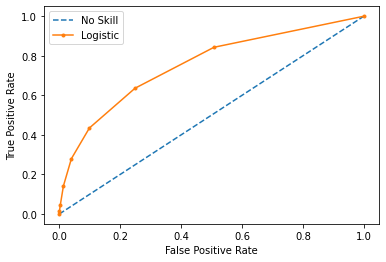

In [216]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model5.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [217]:
# Checking for wrong predicted values

In [218]:
data5[(data5['Actual_y']!=data5['Predicted_y'])]

,Actual_y,Predicted_y
1631,1,0
9125,1,0
4680,0,1
504,0,1
7571,1,0
...,...,...
7209,1,0
1068,1,0
1369,1,0
5314,1,0


##### We can see that there are a total of 552 incorrect predictions, therefore it is an inferior model compared to RF,DT and NBDT

### Comparing the Classification Models

In [219]:
compare_df=pd.DataFrame()

In [220]:
compare_df['Model']=['Logistic Regression','Naive Bayes Decision Tree Classification','Decision Tree Classification','Random Forest Classification','KNN Classification']

In [224]:
compare_df['Train Accuracy']=[round(model1.score(x_train,y_train)*100,2),(model2.score(x_train,y_train))*100,(model3.score(x_train,y_train))*100,(model4.score(x_train,y_train))*100,(model5.score(x_train,y_train))*100]

In [225]:
compare_df['Test Accuracy']=[round(model1.score(x_test,y_test)*100,2),(model2.score(x_test,y_test))*100,(model3.score(x_test,y_test))*100,(model4.score(x_test,y_test))*100,(model5.score(x_test,y_test))*100]

In [228]:
compare_df['True Negative no.']=[tn,tn2,tn3,tn4,tn5]

In [230]:
compare_df['True Positive no.']=[tp,tp2,tp3,tp4,tp5]

In [232]:
compare_df['False Positive no.']=[fp,fp2,fp3,fp4,fp5]

In [234]:
compare_df['False Negative no.']=[fn,fn2,fn3,fn4,fn5]

In [236]:
compare_df['Recall']=[recall_score(y_test,y_pred_LR),recall_score(y_test,y_pred_NBDT),recall_score(y_test,y_pred_DT),recall_score(y_test,y_pred_RF),recall_score(y_test,y_pred_KNN)]

In [238]:
compare_df['F1']=[f1_score(y_test,y_pred_LR),f1_score(y_test,y_pred_NBDT),f1_score(y_test,y_pred_DT),f1_score(y_test,y_pred_RF),f1_score(y_test,y_pred_KNN)]

In [240]:
compare_df['Precision']=[precision_score(y_test,y_pred_LR),precision_score(y_test,y_pred_NBDT),precision_score(y_test,y_pred_DT),precision_score(y_test,y_pred_RF),precision_score(y_test,y_pred_KNN)]

In [242]:
compare_df['ROC-AUC Score']=[roc1,roc2,roc3,roc4,roc5]

In [251]:
compare_df['Incorrect Predictions']=[data1[(data1['Actual_y']!=data1['Predicted_y'])].shape[0],data2[(data2['Actual_y']!=data2['Predicted_y'])].shape[0],data3[(data3['Actual_y']!=data3['Predicted_y'])].shape[0],data4[(data4['Actual_y']!=data4['Predicted_y'])].shape[0],data5[(data5['Actual_y']!=data5['Predicted_y'])].shape[0]]

In [252]:
compare_df

,Model,Train Accuracy,Test Accuracy,True Negative no.,True Positive no.,False Positive no.,False Negative no.,Recall,F1,Precision,ROC-AUC Score,Incorrect Predictions
0,Logistic Regression,81.030000,80.030000,2295,106,68,531,0.166405,0.261406,0.609195,0.749777,599
1,Naive Bayes Decision Tree Classification,82.942857,82.466667,2319,155,44,482,0.243328,0.370813,0.778894,0.800178,526
2,Decision Tree Classification,86.014286,84.533333,2289,247,74,390,0.387755,0.515658,0.769470,0.819342,464
3,Random Forest Classification,86.428571,85.000000,2311,239,52,398,0.375196,0.515086,0.821306,0.841587,450
4,KNN Classification,85.357143,81.600000,2270,178,93,459,0.279435,0.392070,0.656827,0.753262,552


## Final Conclusions

#### 1) In terms of accuracy score, Random Forest Classification provides the best result for train and test set accuracy
#### 2) In terms of incorrect predictions, Logistic Regression had the maximum incorrect predictions and was minimum in Random Forest Classification
#### 3) In terms of precision score Random Forest Classifier had the best score followed by NBDT and DT classifier.
#### 4) In terms of ROC-AUC score, Random Forest Classification has the value closest to 1 and LR and KNN classification have the values farhest from 1
#### 5) Therefore, we can conclude that Random Forest Classification is the best model across all comparison parameters (accuracy score,ROC-AUC score,precision score and no. of incorrect predictions)